In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/home/donatien/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("human_resources.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
target=data["left"] 
target.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
features = data.drop(columns= ["left"])
features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [7]:
def label_encoder(data, column_name):
    # Transforme un type cat´egorie en entier
    le = LabelEncoder()
    # On r´ecup`ere tous les noms de cat´egories possibles
    unique_values = list(data[column_name].unique())
    le_fitted = le.fit(unique_values)
    # On liste l’ensemble des valeurs
    values = list(data[column_name].values)
    # On transforme les cat´egories en entier
    values_transformed = le.transform(values)
    # On fait le remplacement de la colonne dans
    # le dataframe d’origine
    data[column_name] = values_transformed

In [8]:
label_encoder(features,"sales")
label_encoder(features,"salary")
features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [19]:
y=target
X=features

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [48]:
model = MLPClassifier(hidden_layer_sizes=(10,10),activation="relu",solver="adam", max_iter=1000,random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [49]:
model.score(X_train, y_train)

0.9722476873072756

In [50]:
model.score(X_test, y_test)

0.9696666666666667

In [51]:
predict = model.predict(X_test)
cmtx= confusion_matrix(y_test, predict)

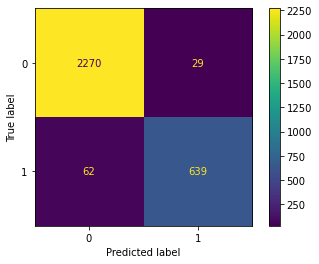

In [54]:
mc = ConfusionMatrixDisplay(cmtx)
mc.plot()
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'hidden_layer_sizes': [(50,),(100,),(150,)],
'activation': ['relu', 'tanh'],
'solver': ['adam', 'sgd'],
}
grid_search = GridSearchCV(MLPClassifier(max_iter=1000,
random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

/home/donatien/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [36]:
def est_bon_attr(attr):
    return data[attr] >= data[attr].mean()

data["bon_employe"] = (est_bon_attr("last_evaluation") &
                            est_bon_attr("average_montly_hours") & 
                            est_bon_attr("number_project") & 
                            est_bon_attr("time_spend_company")
                            )
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,bon_employe
0,0.38,0.53,2,157,3,0,1,0,sales,low,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,True
4,0.37,0.52,2,159,3,0,1,0,sales,low,False
5,0.41,0.50,2,153,3,0,1,0,sales,low,False
6,0.10,0.77,6,247,4,0,1,0,sales,low,True
7,0.92,0.85,5,259,5,0,1,0,sales,low,True
8,0.89,1.00,5,224,5,0,1,0,sales,low,True
9,0.42,0.53,2,142,3,0,1,0,sales,low,False


In [40]:
bonemp = data[data["bon_employe"] == True]
bonemp = bonemp.drop("bon_employe",axis=1)
bonemp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


<AxesSubplot:>

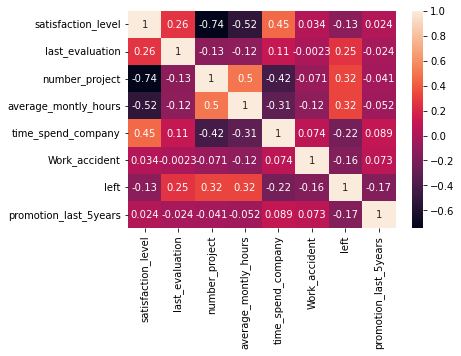

In [41]:
import seaborn as sns 
cr_mtx = bonemp.corr()
sns.heatmap(cr_mtx,annot=True)
